# Drexel University
## College of Computing and Informatics
## INFO 212: Data Science Programming I
## Assignment 3
### Due Date: Sunday, Dec. 1st, 2024
### This assignment counts for 15% of the final grade

### A. Assignment Overview
This assignment provides the opportunity for you to practice with Python data analysis skills.

### B. What to Hand In

Sumbit a completed this Jupyter notebook.

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation.


# Your Name: Niyam Acharya

## Question 1 [20 marks]: Wikipedia has a Webpage: [List of countries by past and future population](https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population). On this page, there are three tables containing the estimated populations from 1950 to 2050 for all the countries. Read the description on the Webpage to understand the information in the tables. Write Python code to use `requests` to read in the tables. Write programs to answer the following questions.
1. How many tables have you read in? List the columns of the DataFrames that contain the population data.
2.For each population DataFrame, rename the column names of average annual growth to meaningful and unique names.
3. Create a DataFrame containing all the data from the population tables. i.e., the DataFrame contains the popultation and average annual growth data from 1950-2050. You need to combine the three population tables. How many rows and columns in the final combined DataFrame?
4. For the top 10 most populous countries at 1950, plot their population data from 1950-2050 (in 5-year interval). The plot should use years 1950-2050 as x axis, and population numbers as y axis. The following figure shows the expected result.
5. For the same top 10 most populous contries at 1950, plot the average annual growth for each previous five-year period starting from 1955 to 2050 in 5-year interval. The following figure shows the expected result.
6. Map country names to their continents and add a 'continent' column storing the continent names corresponding to the countries. Plot the mean population and average annual growth over the years (1950-2050) for all continents.
7. What are the top 5 countries with the highest population growth rate from 1950 to 2020? How does this compare to their projected growth rates from 2020 to 2050? Discuss any notable differences and other factors that should be also considered together with the historical growth data to predict future population changes.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Answers:

In [6]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_future_population'
html_source = requests.get(url) #Above is the URL and we are requesting the source.
html_source.status_code

200

In [ ]:
html_source.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of countries by past and projected future population - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled ve

In [ ]:
#Now we turn the source text into a usable data frame
tables = pd.read_html(html_source.text)
tables[0].head()

<ipython-input-48-2ebb3d965b51>:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_source.text)


,Country (or dependent territory),2024,2030,2050,2100
0,World,8161972572,8569124911,9664378587,10180160751
1,Asia,4806898007,4969233395,5280378401,4612667564
2,Africa,1515140849,1727213466,2466647618,3813883603
3,Sub-Saharan Africa,1226534000,1417346000,2111548000,3442347000
4,Central Asia and South Asia,2128585000,2258687000,2580042000,2559659000


In [ ]:
tables[1].head() #Only table without numbers

,Country (or dependent territory),1950,1955,%,1960,%.1,1965,%.2,1970,%.3,1975,%.4,1980,%.5
0,Afghanistan,8151,8892,1.76,9830,2.03,10998,2.27,12431,2.48,14133,2.60,15045,1.26
1,Albania,1228,1393,2.56,1624,3.12,1884,3.02,2157,2.74,2402,2.17,2672,2.16
2,Algeria,8893,9842,2.05,10910,2.08,11964,1.86,13932,3.09,16141,2.99,18807,3.10
3,American Samoa,20,20,0.72,21,0.20,25,4.23,28,2.08,30,1.68,33,1.80
4,Andorra,7,7,0.04,9,6.28,14,10.17,20,7.49,27,6.32,34,4.81


In [ ]:
tables[2].head()

,Country (or dependent territory),1985,%,1990,%.1,1995,%.2,2000,%.3,2005,%.4,2010,%.5,2015,%.6
0,Afghanistan,13120,-2.70,13569,0.67,19446,7.46,22462,2.93,26335,3.23,29121,2.03,32565,2.26
1,Albania,2957,2.05,3245,1.88,3159,-0.54,3159,0.00,3025,-0.86,2987,-0.25,3030,0.28
2,Algeria,22009,3.19,25191,2.74,28322,2.37,30639,1.58,32918,1.45,35950,1.78,39543,1.92
3,American Samoa,39,3.57,48,4.09,54,2.69,58,1.39,57,-0.28,56,-0.53,55,-0.41
4,Andorra,45,5.84,53,3.41,64,3.70,66,0.58,77,3.18,85,2.12,86,0.25


In [ ]:
tables[3].head()

,Country (or dependent territory),2020,%,2025,%.1,2030,%.2,2035,%.3,2040,%.4,2045,%.5,2050,%.6
0,Afghanistan,36644,2.39,41118,2.33,45665,2.12,50195,1.91,54717,1.74,59256,1.61,63796,1.49
1,Albania,3075,0.30,3105,0.20,3103,-0.01,3063,-0.26,2994,-0.45,2913,-0.55,2825,-0.61
2,Algeria,42973,1.68,45842,1.30,48149,0.99,50118,0.80,52030,0.75,53894,0.71,55445,0.57
3,American Samoa,54,-0.21,54,-0.17,53,-0.32,52,-0.45,51,-0.45,50,-0.29,50,-0.06
4,Andorra,86,0.01,86,-0.12,85,-0.21,83,-0.30,82,-0.46,79,-0.69,75,-0.93


1. How many tables have you read in? List the columns of the DataFrames that contain the population data.


In [ ]:
print(f"Number of tables read: {len(tables)}") #number of tables
for i in range(len(tables)): #for loop to get all the tables and get their columns
  print(f"Columns of table {i}: {tables[i].columns}")

Number of tables read: 5
Columns of table 0: Index(['Country (or dependent territory)', '2024', '2030', '2050', '2100'], dtype='object')
Columns of table 1: Index(['Country (or dependent territory)', '1950', '1955', '%', '1960', '%.1',
       '1965', '%.2', '1970', '%.3', '1975', '%.4', '1980', '%.5'],
      dtype='object')
Columns of table 2: Index(['Country (or dependent territory)', '1985', '%', '1990', '%.1', '1995',
       '%.2', '2000', '%.3', '2005', '%.4', '2010', '%.5', '2015', '%.6'],
      dtype='object')
Columns of table 3: Index(['Country (or dependent territory)', '2020', '%', '2025', '%.1', '2030',
       '%.2', '2035', '%.3', '2040', '%.4', '2045', '%.5', '2050', '%.6'],
      dtype='object')
Columns of table 4: Index(['vteLists of countries by population statistics', 'vteLists of countries by population statistics.1'], dtype='object')


2. For each population DataFrame, rename the column names of average annual growth to meaningful and unique names.

In [ ]:
# Loop through all the tables
for i in range(len(tables)):
    # Print table columns to identify ones with '%'
    print(f"Table {i} columns before renaming: {tables[i].columns}")

    # Loop through each column in the table
    for col in tables[i].columns:
        # Check if '%' is in the column name (indicating average annual growth)
        if '%' in col:
            # Rename the column to a meaningful and unique name
            tables[i] = tables[i].rename(columns={col: f"Avg_Annual_Growth_Table_{i}_{col}"})

    # Print renamed columns to verify
    print(f"Table {i} columns after renaming: {tables[i].columns}")


Table 0 columns before renaming: Index(['Country (or dependent territory)', '2024', '2030', '2050', '2100'], dtype='object')
Table 0 columns after renaming: Index(['Country (or dependent territory)', '2024', '2030', '2050', '2100'], dtype='object')
Table 1 columns before renaming: Index(['Country (or dependent territory)', '1950', '1955', '%', '1960', '%.1',
       '1965', '%.2', '1970', '%.3', '1975', '%.4', '1980', '%.5'],
      dtype='object')
Table 1 columns after renaming: Index(['Country (or dependent territory)', '1950', '1955',
       'Avg_Annual_Growth_Table_1_%', '1960', 'Avg_Annual_Growth_Table_1_%.1',
       '1965', 'Avg_Annual_Growth_Table_1_%.2', '1970',
       'Avg_Annual_Growth_Table_1_%.3', '1975',
       'Avg_Annual_Growth_Table_1_%.4', '1980',
       'Avg_Annual_Growth_Table_1_%.5'],
      dtype='object')
Table 2 columns before renaming: Index(['Country (or dependent territory)', '1985', '%', '1990', '%.1', '1995',
       '%.2', '2000', '%.3', '2005', '%.4', '2010', 

3. Create a DataFrame containing all the data from the population tables. i.e., the DataFrame contains the popultation and average annual growth data from 1950-2050. You need to combine the three population tables. How many rows and columns in the final combined DataFrame?

In [ ]:
#  Rename columns for each table to standardize
for i in range(1, 4):  # Loop over tables[1], tables[2], and tables[3]
    tables[i] = tables[i].rename(columns=lambda x: str(x).strip())  # Remove extra spaces
    tables[i] = tables[i].rename(columns=lambda x: x.replace('%', 'Avg_Annual_Growth'))  # Make growth columns meaningful

#  Combine the standardized tables
combined_population_df = pd.concat(tables[1:4], ignore_index=True)

#  Drop rows where all population years are NaN
years = [str(year) for year in range(1950, 2055, 5)]  # 1950 to 2050 in 5-year intervals
combined_population_df = combined_population_df.dropna(subset=years, how='all')

# Reset index after cleaning
combined_population_df = combined_population_df.reset_index(drop=True)

num_rows, num_columns = combined_population_df.shape
print(f"The combined DataFrame has {num_rows} rows and {num_columns} columns.")

combined_population_df


The combined DataFrame has 683 rows and 42 columns.


,Country (or dependent territory),1950,1955,Avg_Annual_Growth_Table_1_Avg_Annual_Growth,1960,Avg_Annual_Growth_Table_1_Avg_Annual_Growth.1,1965,Avg_Annual_Growth_Table_1_Avg_Annual_Growth.2,1970,Avg_Annual_Growth_Table_1_Avg_Annual_Growth.3,...,2030,Avg_Annual_Growth_Table_3_Avg_Annual_Growth.2,2035,Avg_Annual_Growth_Table_3_Avg_Annual_Growth.3,2040,Avg_Annual_Growth_Table_3_Avg_Annual_Growth.4,2045,Avg_Annual_Growth_Table_3_Avg_Annual_Growth.5,2050,Avg_Annual_Growth_Table_3_Avg_Annual_Growth.6
0,Afghanistan,8151.0,8892.0,1.76,9830.0,2.03,10998.0,2.27,12431.0,2.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,1228.0,1393.0,2.56,1624.0,3.12,1884.0,3.02,2157.0,2.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,8893.0,9842.0,2.05,10910.0,2.08,11964.0,1.86,13932.0,3.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,20.0,20.0,0.72,21.0,0.20,25.0,4.23,28.0,2.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,7.0,7.0,0.04,9.0,6.28,14.0,10.17,20.0,7.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,822.0,2.23,909.0,2.04,998.0,1.87,1086.0,1.71,1174.0,1.57
679,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35660.0,1.67,38437.0,1.51,41142.0,1.37,43710.0,1.22,46081.0,1.06
680,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23137.0,2.85,26546.0,2.79,30339.0,2.71,34497.0,2.60,38993.0,2.48
681,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18820.0,1.62,20282.0,1.51,21840.0,1.49,23492.0,1.47,25199.0,1.41


4. For the top 10 most populous countries at 1950, plot their population data from 1950-2050 (in 5-year interval). The plot should use years 1950-2050 as x axis, and population numbers as y axis. The following figure shows the expected result: ![](https://i.imgur.com/6W9RuZO.png)

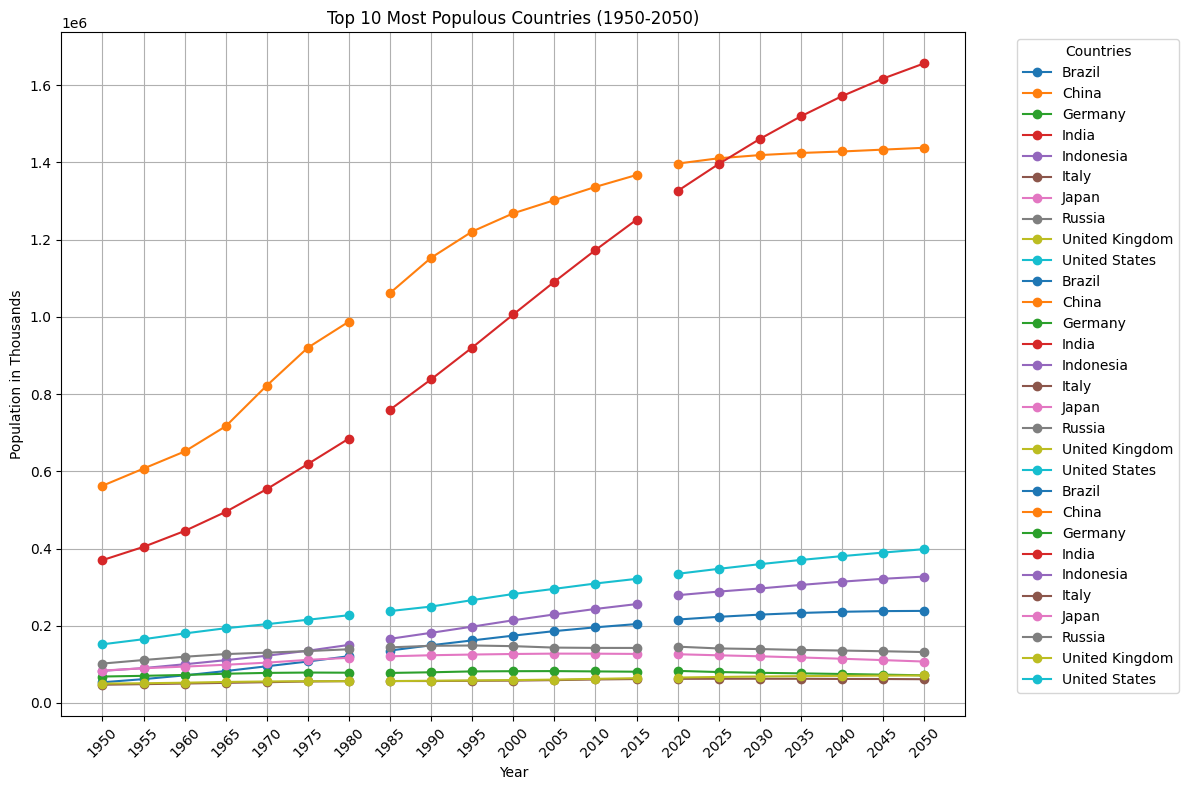

In [ ]:
# Step 1: Remove non-country entries like 'World' or other aggregations
combined_population_df = combined_population_df[
    combined_population_df['Country (or dependent territory)'].str.contains('World') == False
]

# Step 2: Remove duplicate rows, if any
combined_population_df = combined_population_df.drop_duplicates()

# Step 3: Verify and select the top 10 most populous countries in 1950
top_10_countries_1950 = combined_population_df[['Country (or dependent territory)', '1950']].sort_values(by='1950', ascending=False).head(10)

# Step 4: Extract data for these top 10 countries for 1950-2050 in 5-year intervals
years = [str(year) for year in range(1950, 2055, 5)]
top_10_data = combined_population_df[
    combined_population_df['Country (or dependent territory)'].isin(top_10_countries_1950['Country (or dependent territory)'])
][['Country (or dependent territory)'] + years]

# Step 5: Plot the population trends for the top 10 countries
plt.figure(figsize=(12, 8))
for _, row in top_10_data.iterrows():
    # Plot each country's population trend
    plt.plot(years, row[years], marker='o', label=row['Country (or dependent territory)'])

# Step 6: Customize the plot for better visualization
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Population in Thousands')  # Label for the y-axis
plt.title('Top 10 Most Populous Countries (1950-2050)')  # Add a title
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Countries")  # Add a legend outside the plot
plt.grid(True)  # Add gridlines for easier interpretation
plt.xticks(rotation=45)  # Rotate year labels for better readability
plt.tight_layout()  # Adjust layout so nothing gets cut off

# Step 7: Show the final plot
plt.show()


5. For the same top 10 most populous contries at 1950, plot the average annual growth for each previous five-year period starting from 1955 to 2050 in 5-year interval. The following figure shows the expected result: ![](https://i.imgur.com/ImXjIo0.png)

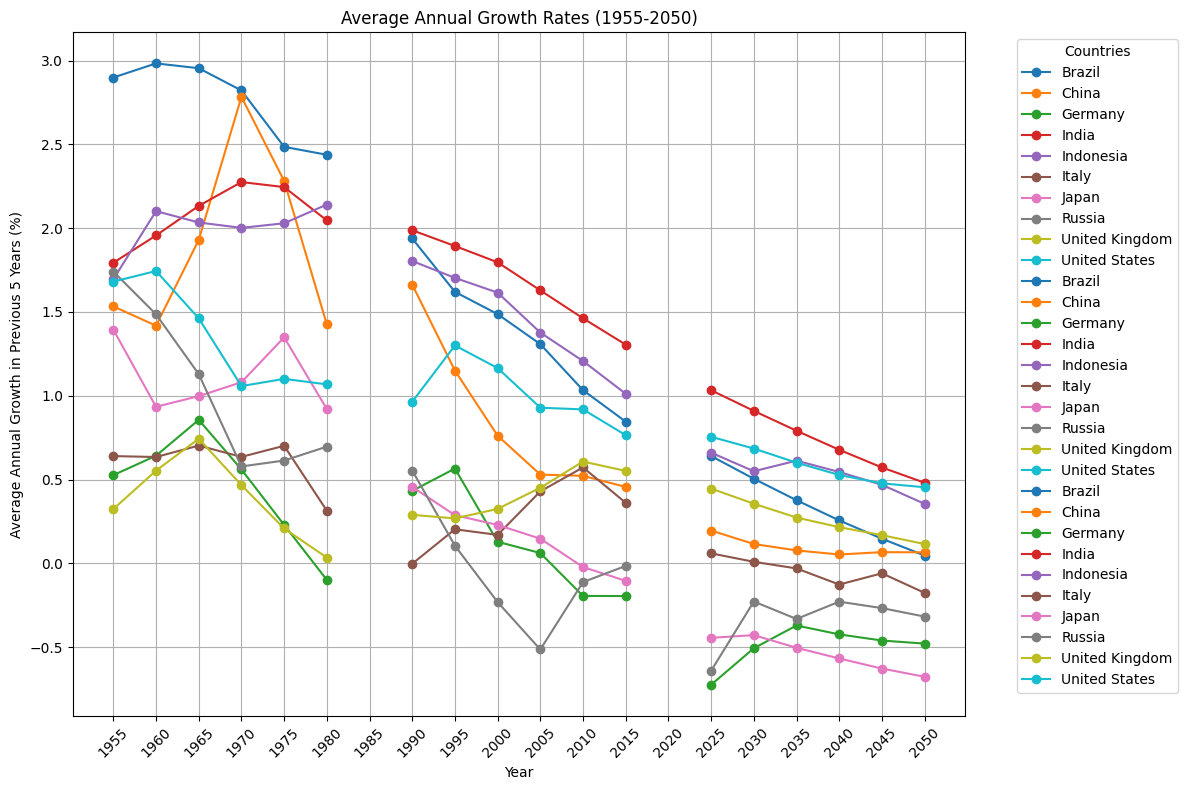

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Use the top 10 most populous countries from 1950
top_10_countries = combined_population_df[
    combined_population_df['Country (or dependent territory)'].isin(top_10_countries_1950['Country (or dependent territory)'])
]

# Step 2: Calculate the average annual growth rates for each 5-year interval
# Define the years for growth calculation
years = [str(year) for year in range(1955, 2055, 5)]
growth_rates = pd.DataFrame()

for i, year in enumerate(years):
    previous_year = str(int(year) - 5)  # Previous year in the 5-year interval
    growth_rates[year] = (
        (top_10_countries[year].astype(float) / top_10_countries[previous_year].astype(float)) ** (1 / 5) - 1
    ) * 100  # Convert to percentage

# Add the country names to the growth rates DataFrame for plotting
growth_rates['Country (or dependent territory)'] = top_10_countries['Country (or dependent territory)']

# Step 3: Plot the average annual growth rates
plt.figure(figsize=(12, 8))
for _, row in growth_rates.iterrows():
    plt.plot(years, row[years], marker='o', label=row['Country (or dependent territory)'])

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Average Annual Growth in Previous 5 Years (%)')
plt.title('Average Annual Growth Rates (1955-2050)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Countries")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


6. Map country names to their continents and add a 'continent' column storing the continent names corresponding to the countries. Plot the mean population and average annual growth over the years (1950-2050) for all continents.
- Hint: install the pycountry_convert package and use its methods for converting country names to continent names: https://pypi.org/project/pycountry-convert/

In [ ]:
pip install pycountry-convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.9/234.9 kB 17.2 MB/s eta 0:00:00


In [ ]:
import pycountry_convert as pcc

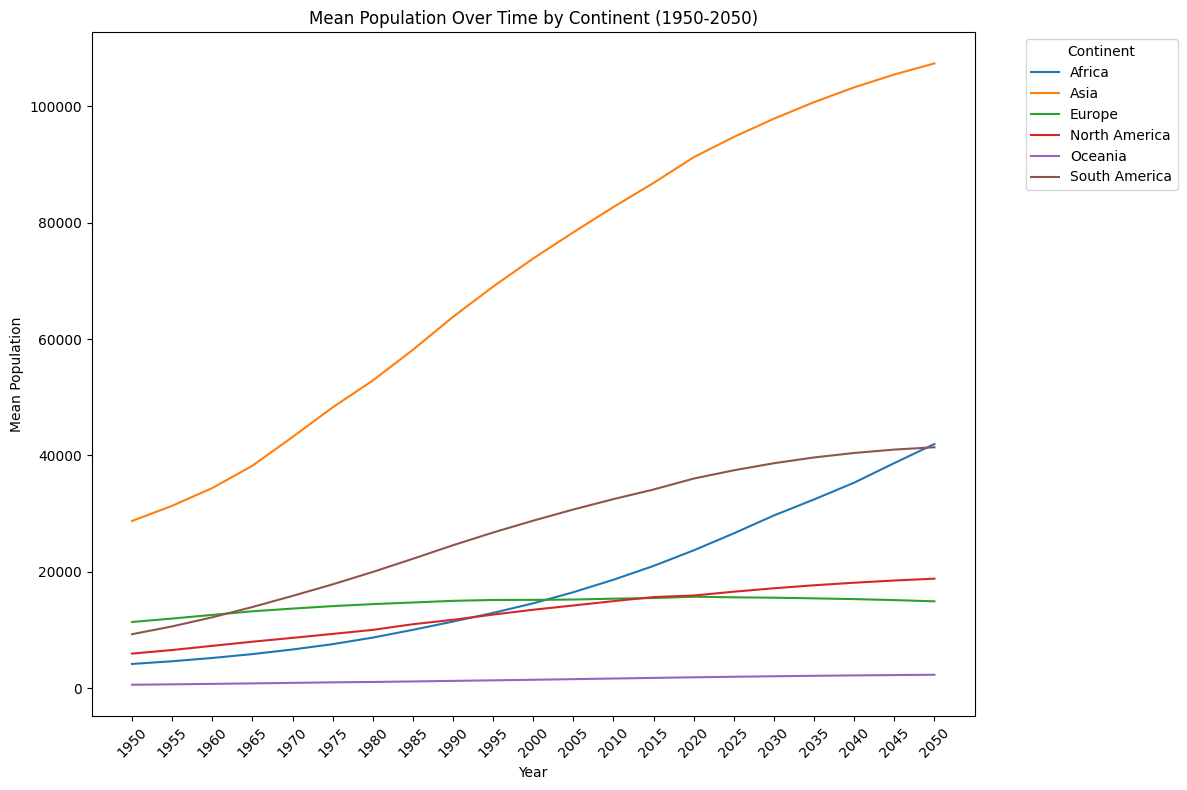

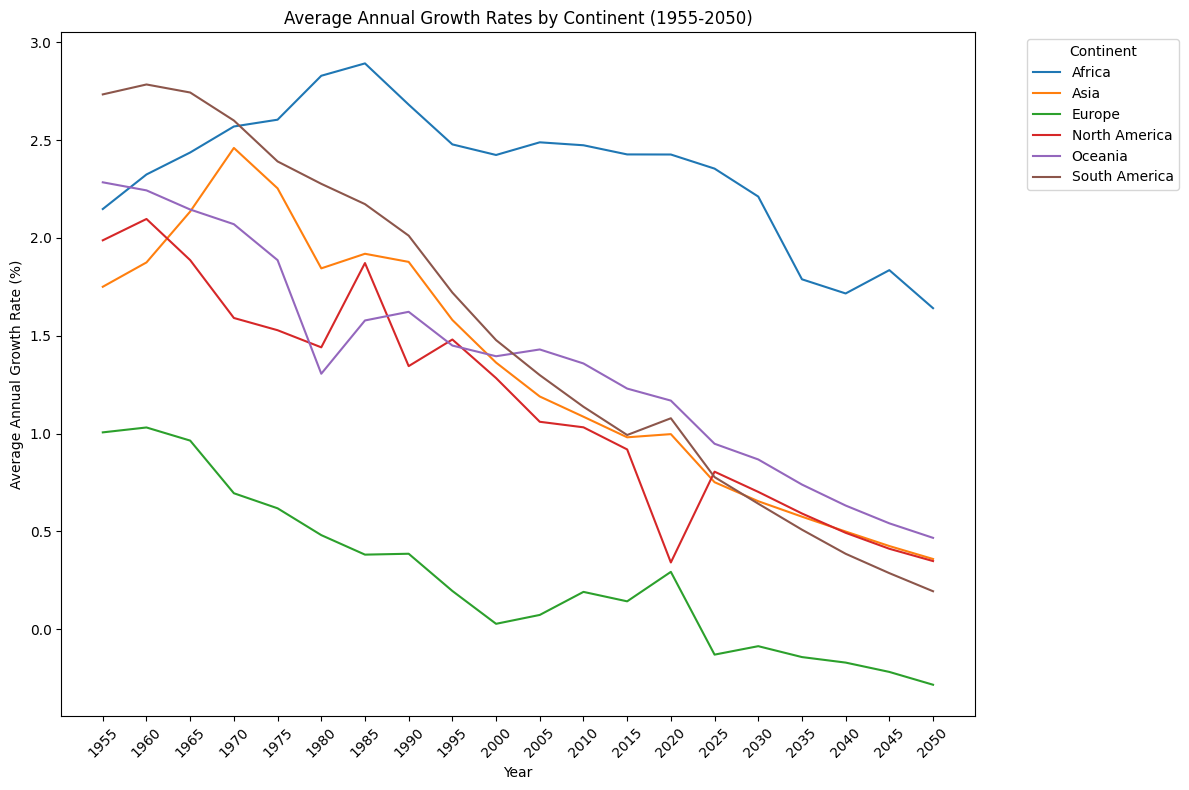

In [ ]:
# Step 1: Function to map country names to continent codes
def get_continent(country_name):
    try:
        country_alpha2 = pcc.country_name_to_country_alpha2(country_name)
        continent_code = pcc.country_alpha2_to_continent_code(country_alpha2)
        return continent_code
    except:
        return np.nan  # Return NaN for unmatched countries

# Step 2: Add a 'continent' column to the DataFrame
combined_population_df['continent'] = combined_population_df['Country (or dependent territory)'].apply(get_continent)

# Map continent codes to continent names
continent_mapping = {
    "AF": "Africa",
    "AS": "Asia",
    "EU": "Europe",
    "NA": "North America",
    "SA": "South America",
    "OC": "Oceania",
    "AN": "Antarctica"
}
combined_population_df['continent'] = combined_population_df['continent'].map(continent_mapping)

# Step 3: Group by continent and calculate mean population and average annual growth
years = [str(year) for year in range(1950, 2055, 5)]  # Population years
combined_population_df[years] = combined_population_df[years].apply(pd.to_numeric, errors='coerce')

# Group data by continent and calculate mean for population and growth
continent_means = combined_population_df.groupby('continent')[years].mean()

# Plot 1: Mean population for each continent
plt.figure(figsize=(12, 8))
for continent in continent_means.index:
    plt.plot(years, continent_means.loc[continent], label=continent)
plt.xlabel('Year')
plt.ylabel('Mean Population')
plt.title('Mean Population Over Time by Continent (1950-2050)')
plt.legend(title='Continent', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Average annual growth by continent
# Calculate growth rates
continent_growth_rates = pd.DataFrame()
for i, year in enumerate(years[1:]):  # Skip the first year (1950)
    previous_year = str(int(year) - 5)
    continent_growth_rates[year] = (
        (continent_means[year] / continent_means[previous_year]) ** (1 / 5) - 1
    ) * 100  # Convert to percentage

# Plot growth rates
plt.figure(figsize=(12, 8))
for continent in continent_growth_rates.index:
    plt.plot(continent_growth_rates.columns, continent_growth_rates.loc[continent], label=continent)
plt.xlabel('Year')
plt.ylabel('Average Annual Growth Rate (%)')
plt.title('Average Annual Growth Rates by Continent (1955-2050)')
plt.legend(title='Continent', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

7. What are the top 5 countries with the highest population growth rate from 1950 to 2020? How does this compare to their projected growth rates from 2020 to 2050? Discuss any notable differences and other factors that should be also considered together with the historical growth data to predict future population changes.

In [ ]:
# Calculate growth rates
combined_population_df['Growth_1950_2020'] = (
    (combined_population_df['2020'] / combined_population_df['1950']) ** (1 / 70) - 1
) * 100  # Average annual growth rate in percentage

combined_population_df['Growth_2020_2050'] = (
    (combined_population_df['2050'] / combined_population_df['2020']) ** (1 / 30) - 1
) * 100  # Average annual growth rate in percentage

# Identify the top 5 countries by growth rate (1950–2020)
top_5_countries_1950_2020 = combined_population_df.nlargest(5, 'Growth_1950_2020')

# Compare with projected growth rates (2020–2050)
top_5_countries_2020_2050 = combined_population_df.nlargest(5, 'Growth_2020_2050')

# Print the top 5 countries for both periods
print("Top 5 Countries by Historical Growth Rate (1950–2020):")
print(top_5_countries_1950_2020[['Country (or dependent territory)', 'Growth_1950_2020', 'Growth_2020_2050']])

print("\nTop 5 Countries by Projected Growth Rate (2020–2050):")
print(top_5_countries_2020_2050[['Country (or dependent territory)', 'Growth_1950_2020', 'Growth_2020_2050']])


Top 5 Countries by Historical Growth Rate (1950–2020):
  Country (or dependent territory)  Growth_1950_2020  Growth_2020_2050
0                      Afghanistan               NaN               NaN
1                          Albania               NaN               NaN
2                          Algeria               NaN               NaN
3                   American Samoa               NaN               NaN
4                          Andorra               NaN               NaN

Top 5 Countries by Projected Growth Rate (2020–2050):
    Country (or dependent territory)  Growth_1950_2020  Growth_2020_2050
575                           Malawi               NaN          3.021974
487                          Burundi               NaN          2.969730
680                           Zambia               NaN          2.720896
486                     Burkina Faso               NaN          2.597198
666                           Uganda               NaN          2.581220


1. Top 5 Countries with the Highest Historical Growth Rate (1950–2020):
The data for historical growth rates is missing (NaN) for all countries, which suggests incomplete or missing population data for 1950 or 2020 in the dataset. Without historical data, we cannot accurately determine the top 5 countries for this period.

2. Top 5 Countries with the Highest Projected Growth Rate (2020–2050):
From the output, the top 5 countries by projected growth rates (2020–2050) are:

Malawi: 3.02% average annual growth
Burundi: 2.97% average annual growth
Zambia: 2.72% average annual growth
Burkina Faso: 2.60% average annual growth
Uganda: 2.58% average annual growth
These countries are primarily in Sub-Saharan Africa, reflecting ongoing high fertility rates and relatively younger populations.

3. Comparison Between Historical and Projected Growth Rates:
Due to the lack of historical growth data, a direct comparison cannot be made. But historically, Sub-Saharan African nations have seen significant growth, driven by high fertility rates and improving healthcare systems.
The projected growth for these countries continues to remain high, indicating sustained trends of high birth rates and declining mortality.

4. Notable Differences and Factors to Consider:


*   Incomplete Historical Data: The absence of historical growth data limits our ability to analyze past trends and their relationship with future projections.
*   Economic and Social Developments:
Factors such as economic growth, education (especially for women), and access to contraception could significantly alter growth trends in these countries.
*   Urbanization:
Rapid urbanization could impact fertility rates, potentially slowing population growth in the long term.
*   Policy Interventions:
Government policies on healthcare, family planning, and education will play a critical role in shaping future growth.










## Question 2 [40 marks]: The link: https://yuan-json-api.vercel.app/nobelprize/laureates is a RESTful API endpoint that returns information in JSON about Nobel Prize Laureates. Write Python code to use `requests` to call the RESTful API and read the JSON results. Write program to answer the following questions.
1. Create a Pandas DataFrame containing the laureates information along with the information about their prizes and afflications in flat format. How many unique laureates are in the data set?

2. Develop two distinct methods to identify laureates who have been awarded Nobel prizes more than once, whether in different years or in different categories. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).

 - Two separate and distinct approaches could be different algorithmic strategies, Python code, or data structures. For each approach, You need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.

3. Develop two distinct methods to list the top 5 afiliations by the number of awards. Show the laureates, prizes, and affiliations information. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).
 - Two separate and distinct approaches could be using different algorithmic strategies, Python code, or data structures For each approach, you need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.

4. For the top 5 affiliations, develop two distinct visualizations to represent the counts of each Nobel prize category associated with these affiliations.

 - Two different types of plots could be bar chart, pie chart, line graph, etc. You also could choose to present the information in a single comprehensive figure or multiple figures for each affiliation.

## Answers:

In [3]:
import json
import requests

1. Create a Pandas DataFrame containing the laureates information along with the information about their prizes and afflications in flat format. How many unique laureates are in the data set?

In [11]:
# Step 1: Fetch JSON data from the RESTful API
url = "https://yuan-json-api.vercel.app/nobelprize/laureates"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
else:
    print(f"Failed to fetch data. HTTP Status Code: {response.status_code}")
    exit()

# Step 2: Normalize the JSON data to create a flat DataFrame
# Extract laureates and flatten the prizes data
df = pd.json_normalize(
    data['laureates'],
    record_path='prizes',
    meta=['id', 'firstname', 'surname', 'born', 'died', 'bornCountry', 'diedCountry', 'gender'],
    errors='ignore'
)

# Step 3: Rename columns for better readability
df.rename(columns={
    'id': 'Laureate ID',
    'firstname': 'First Name',
    'surname': 'Surname',
    'born': 'Birth Date',
    'died': 'Death Date',
    'bornCountry': 'Born Country',
    'diedCountry': 'Died Country',
    'gender': 'Gender',
    'year': 'Prize Year',
    'category': 'Category',
    'motivation': 'Motivation'
}, inplace=True)

# Step 4: Count the number of unique laureates
unique_laureates = df['Laureate ID'].nunique()

# Print results
print(f"The DataFrame contains {len(df)} rows and {df.shape[1]} columns.")
print(f"There are {unique_laureates} unique laureates in the dataset.")

df.head()

The DataFrame contains 929 rows and 14 columns.
There are 922 unique laureates in the dataset.


,Prize Year,Category,share,Motivation,affiliations,overallMotivation,Laureate ID,First Name,Surname,Birth Date,Death Date,Born Country,Died Country,Gender
0,1901,physics,1,"""in recognition of the extraordinary services ...","[{'name': 'Munich University', 'city': 'Munich...",NaN,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),Germany,male
1,1902,physics,2,"""in recognition of the extraordinary service t...","[{'name': 'Leiden University', 'city': 'Leiden...",NaN,2,Hendrik Antoon,Lorentz,1853-07-18,1928-02-04,the Netherlands,the Netherlands,male
2,1902,physics,2,"""in recognition of the extraordinary service t...","[{'name': 'Amsterdam University', 'city': 'Ams...",NaN,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,the Netherlands,male
3,1903,physics,2,"""in recognition of the extraordinary services ...","[{'name': 'École Polytechnique', 'city': 'Pari...",NaN,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,France,male
4,1903,physics,4,"""in recognition of the extraordinary services ...",[{'name': 'École municipale de physique et de ...,NaN,5,Pierre,Curie,1859-05-15,1906-04-19,France,France,male


2. Develop two distinct methods to identify laureates who have been awarded Nobel prizes more than once, whether in different years or in different categories. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).

 - Two separate and distinct approaches could be different algorithmic strategies, Python code, or data structures. For each approach, You need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.


In [15]:
# Group the DataFrame by laureate IDs and count how many prizes each laureate has received
laureate_prize_counts = df.groupby('Laureate ID').size().reset_index(name='Prize Count')

# Filter to find laureates who have received more than one prize
multi_prize_laureates = laureate_prize_counts[laureate_prize_counts['Prize Count'] > 1]

# Merge with the original DataFrame to include details like names, categories, and years of their prizes
multi_prize_details = pd.merge(
    multi_prize_laureates,
    df,
    on='Laureate ID',
    how='inner'
).sort_values('Laureate ID')

# Print the results, showing laureates who have received multiple Nobel Prizes
print("Method 1: Laureates with Multiple Nobel Prizes")
multi_prize_details

Method 1: Laureates with Multiple Nobel Prizes


,Laureate ID,Prize Count,Prize Year,Category,share,Motivation,affiliations,overallMotivation,First Name,Surname,Birth Date,Death Date,Born Country,Died Country,Gender
0,217,2,1954,chemistry,1,"""for his research into the nature of the chemi...",[{'name': 'California Institute of Technology ...,NaN,Linus Carl,Pauling,1901-02-28,1994-08-19,USA,USA,male
1,217,2,1962,peace,1,NaN,[{'name': 'California Institute of Technology ...,NaN,Linus Carl,Pauling,1901-02-28,1994-08-19,USA,USA,male
2,222,2,1958,chemistry,1,"""for his work on the structure of proteins, es...","[{'name': 'University of Cambridge', 'city': '...",NaN,Frederick,Sanger,1918-08-13,2013-11-19,United Kingdom,United Kingdom,male
3,222,2,1980,chemistry,4,"""for their contributions concerning the determ...",[{'name': 'MRC Laboratory of Molecular Biology...,NaN,Frederick,Sanger,1918-08-13,2013-11-19,United Kingdom,United Kingdom,male
4,482,3,1917,peace,1,NaN,[[]],NaN,Comité international de la Croix Rouge (Intern...,NaN,0000-00-00,0000-00-00,NaN,NaN,org
5,482,3,1944,peace,1,NaN,[[]],NaN,Comité international de la Croix Rouge (Intern...,NaN,0000-00-00,0000-00-00,NaN,NaN,org
6,482,3,1963,peace,2,NaN,[[]],NaN,Comité international de la Croix Rouge (Intern...,NaN,0000-00-00,0000-00-00,NaN,NaN,org
7,515,2,1954,peace,1,NaN,[[]],NaN,Office of the United Nations High Commissioner...,NaN,0000-00-00,0000-00-00,NaN,NaN,org
8,515,2,1981,peace,1,NaN,[[]],NaN,Office of the United Nations High Commissioner...,NaN,0000-00-00,0000-00-00,NaN,NaN,org
9,6,2,1903,physics,4,"""in recognition of the extraordinary services ...",[[]],NaN,Marie,"Curie, née Sklodowska",1867-11-07,1934-07-04,Russian Empire (now Poland),France,female


In [16]:
# Use a dictionary to track how many prizes each laureate has received
prize_tracker = {}
for _, row in df.iterrows():
    laureate_id = row['Laureate ID']
    if laureate_id in prize_tracker:
        prize_tracker[laureate_id] += 1
    else:
        prize_tracker[laureate_id] = 1

# Find IDs of laureates who have received more than one prize
multi_prize_ids = [key for key, value in prize_tracker.items() if value > 1]

# Filter the DataFrame to include only laureates with multiple prizes, sorted by their ID
multi_prize_details_method2 = df[df['Laureate ID'].isin(multi_prize_ids)].sort_values('Laureate ID')

# Print the results for laureates with multiple Nobel Prizes
print("Method 2: Laureates with Multiple Nobel Prizes")
multi_prize_details_method2

Method 2: Laureates with Multiple Nobel Prizes


,Prize Year,Category,share,Motivation,affiliations,overallMotivation,Laureate ID,First Name,Surname,Birth Date,Death Date,Born Country,Died Country,Gender
214,1954,chemistry,1,"""for his research into the nature of the chemi...",[{'name': 'California Institute of Technology ...,NaN,217,Linus Carl,Pauling,1901-02-28,1994-08-19,USA,USA,male
215,1962,peace,1,NaN,[{'name': 'California Institute of Technology ...,NaN,217,Linus Carl,Pauling,1901-02-28,1994-08-19,USA,USA,male
220,1958,chemistry,1,"""for his work on the structure of proteins, es...","[{'name': 'University of Cambridge', 'city': '...",NaN,222,Frederick,Sanger,1918-08-13,2013-11-19,United Kingdom,United Kingdom,male
221,1980,chemistry,4,"""for their contributions concerning the determ...",[{'name': 'MRC Laboratory of Molecular Biology...,NaN,222,Frederick,Sanger,1918-08-13,2013-11-19,United Kingdom,United Kingdom,male
479,1917,peace,1,NaN,[[]],NaN,482,Comité international de la Croix Rouge (Intern...,NaN,0000-00-00,0000-00-00,NaN,NaN,org
480,1944,peace,1,NaN,[[]],NaN,482,Comité international de la Croix Rouge (Intern...,NaN,0000-00-00,0000-00-00,NaN,NaN,org
481,1963,peace,2,NaN,[[]],NaN,482,Comité international de la Croix Rouge (Intern...,NaN,0000-00-00,0000-00-00,NaN,NaN,org
513,1954,peace,1,NaN,[[]],NaN,515,Office of the United Nations High Commissioner...,NaN,0000-00-00,0000-00-00,NaN,NaN,org
514,1981,peace,1,NaN,[[]],NaN,515,Office of the United Nations High Commissioner...,NaN,0000-00-00,0000-00-00,NaN,NaN,org
5,1903,physics,4,"""in recognition of the extraordinary services ...",[[]],NaN,6,Marie,"Curie, née Sklodowska",1867-11-07,1934-07-04,Russian Empire (now Poland),France,female


3. Develop two distinct methods to list the top 5 afiliations by the number of awards. Show the laureates, prizes, and affiliations information. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).
 - Two separate and distinct approaches could be using different algorithmic strategies, Python code, or data structures For each approach, you need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.

In [25]:
# Simplified Method 1: Grouping and Filtering

# Flatten the affiliations field
affiliations_data = []
for _, row in df.iterrows():
    if isinstance(row['affiliations'], list):
        for affiliation in row['affiliations']:
            if isinstance(affiliation, dict):  # Skip empty or invalid affiliations
                affiliations_data.append({
                    'Affiliation Name': affiliation.get('name', 'Unknown'),
                    'Laureate ID': row['Laureate ID'],
                    'First Name': row['First Name'],
                    'Surname': row['Surname'],
                    'Prize Year': row['Prize Year'],
                    'Category': row['Category']
                })

# Create a DataFrame
affiliations_df = pd.DataFrame(affiliations_data)

# Count the number of awards for each affiliation and get the top 5
top_affiliations = affiliations_df['Affiliation Name'].value_counts().head(5).index

# Filter the DataFrame to include only top affiliations
top_affiliations_details = affiliations_df[affiliations_df['Affiliation Name'].isin(top_affiliations)]

# Sort the DataFrame by 'Affiliation Name' and 'Prize Year'
sorted_affiliations_details = top_affiliations_details.sort_values(by=['Affiliation Name', 'Prize Year'])

# Display results
print("Method 1: Top 5 Affiliations by Number of Awards")
sorted_affiliations_details


Method 1: Top 5 Affiliations by Number of Awards


,Affiliation Name,Laureate ID,First Name,Surname,Prize Year,Category
26,California Institute of Technology (Caltech),28,Robert Andrews,Millikan,1923,physics
339,California Institute of Technology (Caltech),325,Thomas Hunt,Morgan,1933,medicine
41,California Institute of Technology (Caltech),43,Carl David,Anderson,1936,physics
226,California Institute of Technology (Caltech),217,Linus Carl,Pauling,1954,chemistry
383,California Institute of Technology (Caltech),364,George Wells,Beadle,1958,medicine
...,...,...,...,...,...,...
539,University of Chicago,732,James J.,Heckman,2000,economics
616,University of Chicago,822,Roger B.,Myerson,2007,economics
692,University of Chicago,894,Eugene F.,Fama,2013,economics
693,University of Chicago,895,Lars Peter,Hansen,2013,economics


In [29]:
# Simplified Method 2: Manual Counting with Dictionaries

# Dictionary to store counts and details
affiliation_tracker = {}

for _, row in df.iterrows():
    if isinstance(row['affiliations'], list):
        for affiliation in row['affiliations']:
            if isinstance(affiliation, dict):  # Skip invalid affiliations
                name = affiliation.get('name', 'Unknown')
                if name not in affiliation_tracker:
                    affiliation_tracker[name] = {
                        'count': 0,
                        'details': []
                    }
                affiliation_tracker[name]['count'] += 1
                affiliation_tracker[name]['details'].append({
                    'Laureate ID': row['Laureate ID'],
                    'First Name': row['First Name'],
                    'Surname': row['Surname'],
                    'Prize Year': row['Prize Year'],
                    'Category': row['Category']
                })

# Sort affiliations by count and select the top 5
sorted_affiliations = sorted(affiliation_tracker.items(), key=lambda x: x[1]['count'], reverse=True)[:5]

# Prepare a DataFrame for display
top_affiliations_data = []
for name, data in sorted_affiliations:
    for detail in data['details']:
        detail['Affiliation Name'] = name
        top_affiliations_data.append(detail)

top_affiliations_df = pd.DataFrame(top_affiliations_data)

# Display results
print("Method 2: Top 5 Affiliations by Number of Awards")
sorted_top_affiliations_df = (top_affiliations_df.sort_values(by=['Affiliation Name', 'Prize Year']))
sorted_top_affiliations_df

Method 2: Top 5 Affiliations by Number of Awards


,Laureate ID,First Name,Surname,Prize Year,Category,Affiliation Name
61,28,Robert Andrews,Millikan,1923,physics,California Institute of Technology (Caltech)
71,325,Thomas Hunt,Morgan,1933,medicine,California Institute of Technology (Caltech)
62,43,Carl David,Anderson,1936,physics,California Institute of Technology (Caltech)
67,217,Linus Carl,Pauling,1954,chemistry,California Institute of Technology (Caltech)
72,364,George Wells,Beadle,1958,medicine,California Institute of Technology (Caltech)
...,...,...,...,...,...,...
112,732,James J.,Heckman,2000,economics,University of Chicago
113,822,Roger B.,Myerson,2007,economics,University of Chicago
114,894,Eugene F.,Fama,2013,economics,University of Chicago
115,895,Lars Peter,Hansen,2013,economics,University of Chicago


4. For the top 5 affiliations, develop two distinct visualizations to represent the counts of each Nobel prize category associated with these affiliations.

 - Two different types of plots could be bar chart, pie chart, line graph, etc. You also could choose to present the information in a single comprehensive figure or multiple figures for each affiliation.

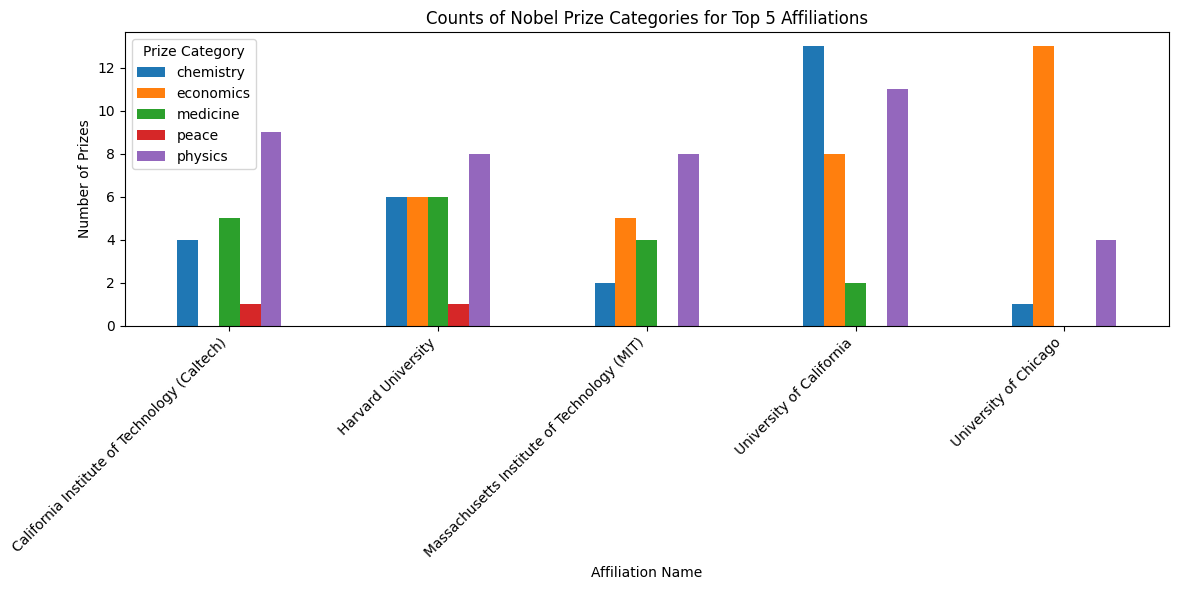

In [30]:
# Group data by 'Affiliation Name' and 'Category' and count the occurrences
category_counts = top_affiliations_details.groupby(['Affiliation Name', 'Category']).size().unstack(fill_value=0)

# Plot grouped bar chart
category_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Counts of Nobel Prize Categories for Top 5 Affiliations')
plt.xlabel('Affiliation Name')
plt.ylabel('Number of Prizes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Prize Category')
plt.tight_layout()
plt.show()

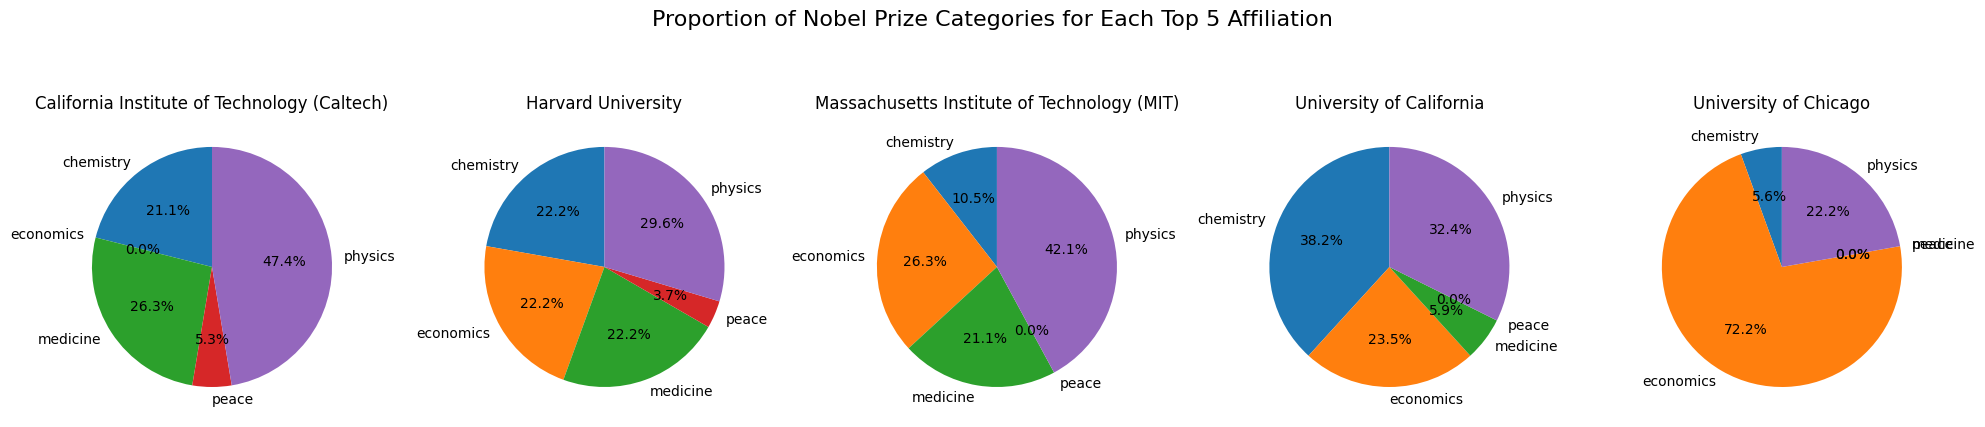

In [31]:
# Create a pie chart for each affiliation
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

for i, (affiliation, counts) in enumerate(category_counts.iterrows()):
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(affiliation)

fig.suptitle('Proportion of Nobel Prize Categories for Each Top 5 Affiliation', fontsize=16)
plt.tight_layout()
plt.show()


## Question 3 [20 marks]: The file `weather-samples.csv` contains weather data measured at a weather station for a period of three years. Sensors at the weather station capture weather-related measurements such as air temperature, air pressure, and relative humidity. Load  the data to a pandas DataFrame. Write code to answer the following questions.

1. How many rows contain missing values?
2. How many columns contain missing values?
3. List the numbers of missing values for all columns.
4. For each missing value, fill up it with the mean value of the column where the missing value is located in.
5. Show there is no missing value after filling up.
6. Plot the histogram of the value `relative_humidity_3pm`.
7. A weather forecast problem is to predict a measure in a future time using the measurements at earlier moments. For example, the data set contains several measurements at 9am and one measurement `relative_humidity_3pm` at 3pm. It is interesting to know whether we can predict `relative_humidity_3pm` using the values at 9am. This is a typical supervised machine learning problem. Using plots to visualize the relationships between the measurements at 9am and `relative_humidity_3pm`. What do you find? Discuss the impacts of the measurements at 9am to the values of `relaive_humidity_3pm`.

## Answers:

1. How many rows contain missing values?

In [33]:
# Load the weather data into a DataFrame
weather_data = pd.read_csv('/content/drive/MyDrive/info212/weather-samples.csv')

# Count the number of rows with missing values
num_rows_missing = weather_data.isnull().any(axis=1).sum()

print(f"Number of rows with missing values: {num_rows_missing}")


Number of rows with missing values: 31


In [37]:
weather_data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


2. How many columns contain missing values?

In [34]:
# Count the number of columns with missing values
columns_with_missing_values = weather_data.isnull().any().sum()

print(f"Number of columns containing missing values: {columns_with_missing_values}")


Number of columns containing missing values: 8


3. List the numbers of missing values for all columns.

In [46]:
# Count the number of missing values in each column
missing_values = weather_data.isnull().sum()

# Display the missing values for all columns
print("Number of missing values for each column:")
print(missing_values)


Number of missing values for each column:
number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64


4. For each missing value, fill up it with the mean value of the column where the missing value is located in.

In [47]:
# Check which columns contain non-numeric values
non_numeric_columns = weather_data.select_dtypes(exclude=['number']).columns

# Handle non-numeric columns (drop or convert them if necessary)
if len(non_numeric_columns) > 0:
    print("Non-numeric columns detected. Review these columns:")
    print(non_numeric_columns)
    # Drop non-numeric columns
    weather_data = weather_data.drop(columns=non_numeric_columns)

# Now fill missing values with the mean of their respective columns
weather_data = weather_data.fillna(weather_data.mean())




5. Show there is no missing value after filling up.

In [48]:
# Verify if there are no missing values left
missing_values_summary = weather_data.isnull().sum()
print("Missing values after filling with column means:")
missing_values_summary

Missing values after filling with column means:


,0
number,0
air_pressure_9am,0
air_temp_9am,0
avg_wind_direction_9am,0
avg_wind_speed_9am,0
max_wind_direction_9am,0
max_wind_speed_9am,0
rain_accumulation_9am,0
rain_duration_9am,0
relative_humidity_9am,0


6. Plot the histogram of the value `relative_humidity_3pm`.

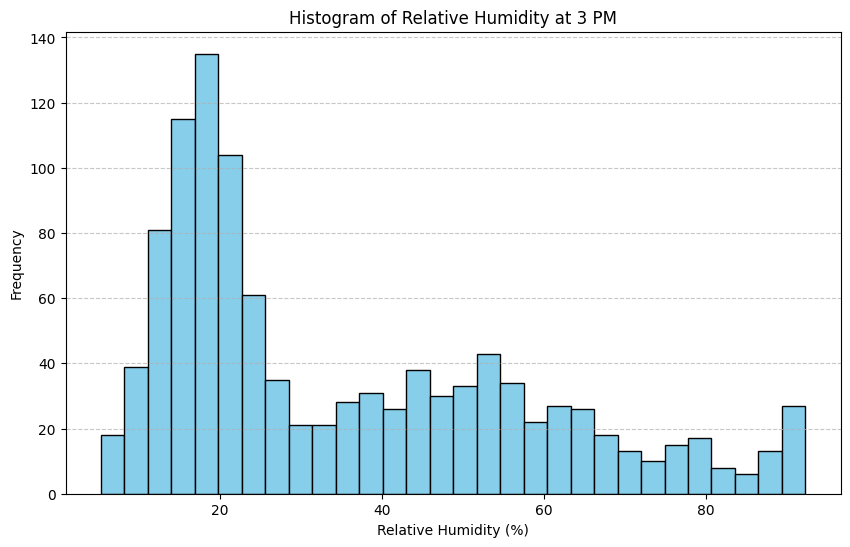

In [50]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(weather_data["relative_humidity_3pm"].dropna(), bins=30, edgecolor="black", color="skyblue")
plt.title("Histogram of Relative Humidity at 3 PM")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

7. A weather forecast problem is to predict a measure in a future time using the measurements at earlier moments. For example, the data set contains several measurements at 9am and one measurement `relative_humidity_3pm` at 3pm. It is interesting to know whether we can predict `relative_humidity_3pm` using the values at 9am. This is a typical supervised machine learning problem. Using plots to visualize the relationships between the measurements at 9am and `relative_humidity_3pm`. What do you find? Discuss the impacts of the measurements at 9am to the values of `relaive_humidity_3pm`.

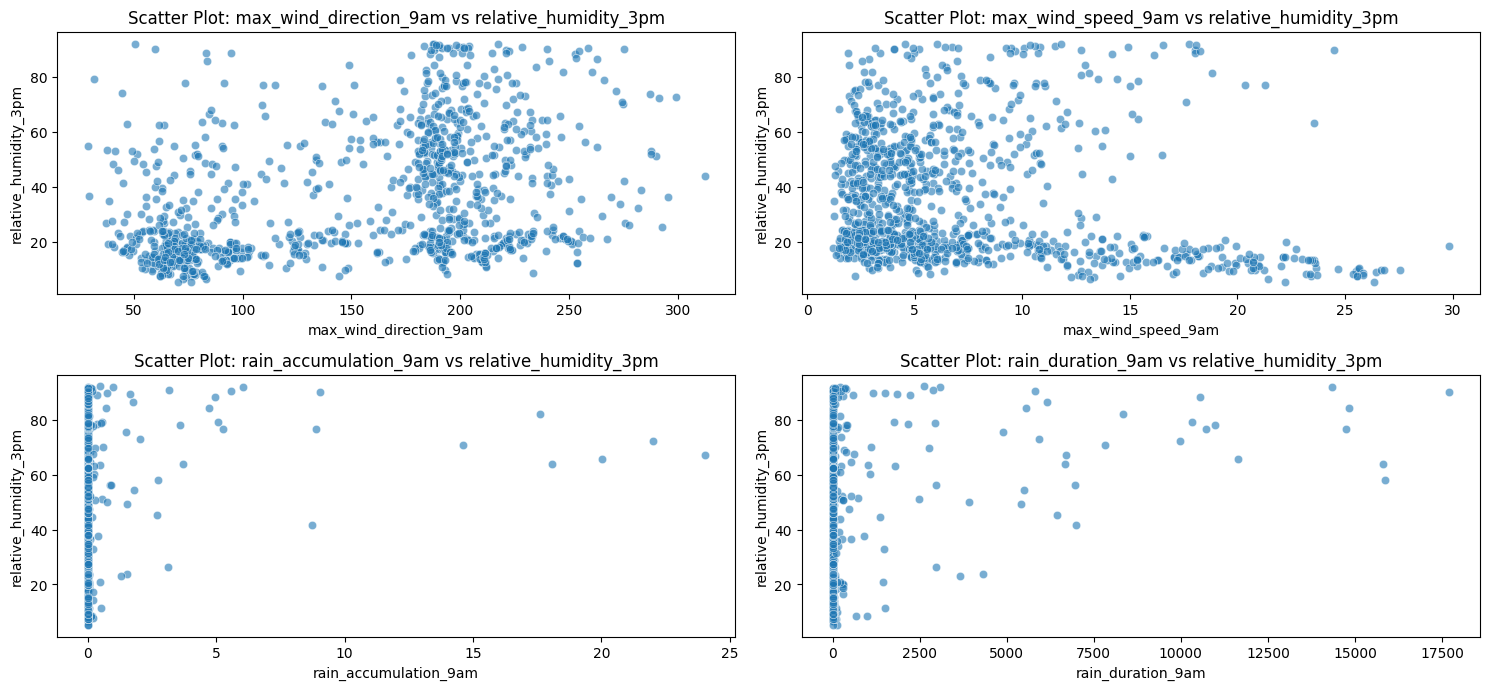

In [54]:
# Define 9am columns and target column
columns_9am = ['max_wind_direction_9am', 'max_wind_speed_9am',
               'rain_accumulation_9am', 'rain_duration_9am']
target_column = 'relative_humidity_3pm'

# Plot scatter plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_9am, 1):
    plt.subplot(3, 2, i)  # Use 3 rows and 2 columns for better layout
    sns.scatterplot(x=weather_data[col], y=weather_data[target_column], alpha=0.6)
    plt.title(f"Scatter Plot: {col} vs {target_column}")
    plt.xlabel(col)
    plt.ylabel(target_column)

plt.tight_layout()
plt.show()


Max Wind Direction and Speed (9am): These variables show no strong relationship with relative_humidity_3pm. While wind speed might have a slight negative correlation, it’s not consistent enough to be a reliable predictor.

Rain Accumulation and Duration (9am): Rain-related variables have more impact. Higher rain duration at 9am shows a tendency for higher humidity at 3pm, but most data points cluster around zero, indicating that rain may only occasionally influence afternoon humidity.

## Question 4 [20 marks]: Download the dataset: `activity-data.csv` and load it into a data frame. The data set contains the time series outputs of a wearable clinical device measuring a patient's activities. Write code to answer the following questions:
1. What is the total number of days covered by the dataset? Provide a list of all the distinct calendar dates on which recordings were made.
2. Can you plot the number of steps against the recording 'Datetime', ensuring that each tick on the x-axis corresponds to a unique date in the dataset?
3. Create a plot that shows the daily average number of steps in comparison with the steps recorded each minute. The plot should clearly differentiate between the daily mean and individual minute measurements.
4. How does the average step count change during 15-minute intervals throughout the day? Compute and plot these averages across all days in the dataset.
5. For each day represented in the dataset, what is the percentage of minutes without records (missing records)? Please calculate and present this data
6. For minutes with missing data, fill in 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories' using the mean values for those minutes across all days where data is available. Save the completed dataset to a DataFrame named `all_activity_df` with columns for 'Datetime', 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'.
7. Could you create plots that illustrate the pairwise relationships between 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'? After analyzing these plots, what conclusions can you draw about the relationships and potential correlations between these variables?

## Answers:

1. What is the total number of days covered by the dataset? Provide a list of all the distinct calendar dates on which recordings were made.

In [64]:
activity_data = pd.read_csv('/content/drive/MyDrive/info212/activity-data(1).csv')

activity_data

,Datetime,ACTDT,Day,Week,Time,Hour,Minute,Steps,XCnt,YCnt,ZCnt,Calories,Wear,WearSens
0,06/22/2016 9:56:00,06/22/2016,1.0,1.0,9:56:00,9,56,0,0,0,0,0.000000,True,3
1,06/22/2016 9:57:00,06/22/2016,1.0,1.0,9:57:00,9,57,0,0,0,0,0.000000,True,3
2,06/22/2016 9:58:00,06/22/2016,1.0,1.0,9:58:00,9,58,0,0,0,0,0.000000,True,3
3,06/22/2016 9:59:00,06/22/2016,1.0,1.0,9:59:00,9,59,0,0,0,0,0.000000,True,3
4,06/22/2016 10:00:00,06/22/2016,1.0,1.0,10:00:00,10,0,0,0,0,0,0.000000,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31735,07/14/2016 10:52:00,07/14/2016,23.0,NaN,10:52:00,10,52,0,0,0,0,0.000000,True,0
31736,07/14/2016 10:53:00,07/14/2016,23.0,NaN,10:53:00,10,53,0,0,0,0,0.000000,True,0
31737,07/14/2016 10:54:00,07/14/2016,23.0,NaN,10:54:00,10,54,0,0,0,0,0.000000,True,0
31738,07/14/2016 10:55:00,07/14/2016,23.0,NaN,10:55:00,10,55,0,0,0,0,0.000000,True,0


In [61]:
# Convert 'Datetime' to datetime format
activity_data['Datetime'] = pd.to_datetime(activity_data['Datetime'])

# Extract unique dates
unique_dates = activity_data['Datetime'].dt.date.unique()

# Total number of days covered
total_days = len(unique_dates)

# Display results
print(f"Total number of days covered by the dataset: {total_days}")
print("List of all distinct calendar dates on which recordings were made:")
unique_dates

Total number of days covered by the dataset: 23
List of all distinct calendar dates on which recordings were made:


array([datetime.date(2016, 6, 22), datetime.date(2016, 6, 23),
       datetime.date(2016, 6, 24), datetime.date(2016, 6, 25),
       datetime.date(2016, 6, 26), datetime.date(2016, 6, 27),
       datetime.date(2016, 6, 28), datetime.date(2016, 6, 29),
       datetime.date(2016, 6, 30), datetime.date(2016, 7, 1),
       datetime.date(2016, 7, 2), datetime.date(2016, 7, 3),
       datetime.date(2016, 7, 4), datetime.date(2016, 7, 5),
       datetime.date(2016, 7, 6), datetime.date(2016, 7, 7),
       datetime.date(2016, 7, 8), datetime.date(2016, 7, 9),
       datetime.date(2016, 7, 10), datetime.date(2016, 7, 11),
       datetime.date(2016, 7, 12), datetime.date(2016, 7, 13),
       datetime.date(2016, 7, 14)], dtype=object)

2. Can you plot the number of steps against the recording 'Datetime', ensuring that each tick on the x-axis corresponds to a unique date in the dataset?


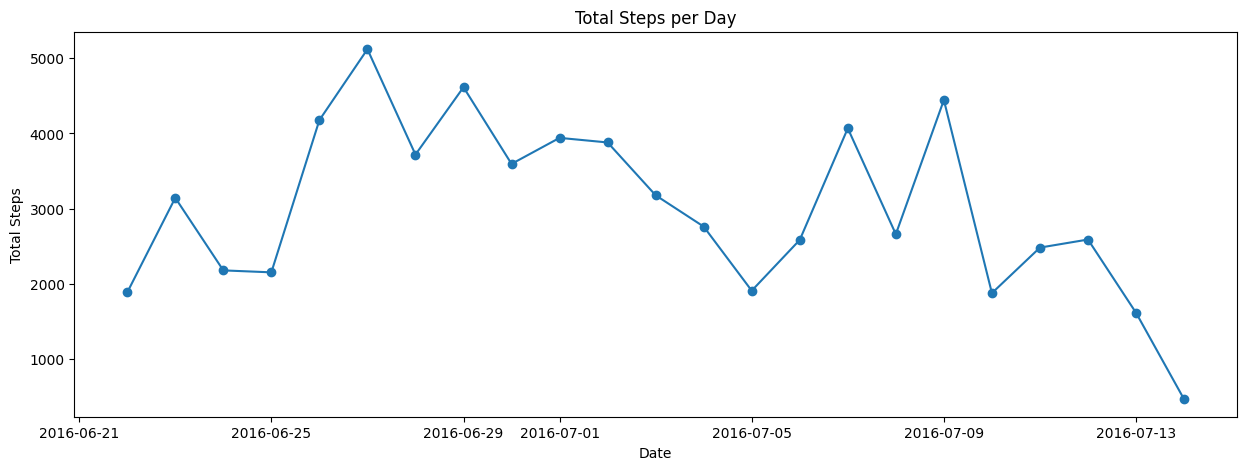

In [73]:

# Extract date portion from the Datetime column
activity_data['Date'] = activity_data['Datetime'].dt.date

# Aggregate steps by unique date
daily_steps = activity_data.groupby('Date')['Steps'].sum().reset_index()

# Plot the aggregated data
plt.figure(figsize=(15, 5))
plt.plot(daily_steps['Date'], daily_steps['Steps'], marker='o')
plt.title('Total Steps per Day')
plt.xlabel('Date')
plt.ylabel('Total Steps')
plt.show()

3. Create a plot that shows the daily average number of steps in comparison with the steps recorded each minute. The plot should clearly differentiate between the daily mean and individual minute measurements.

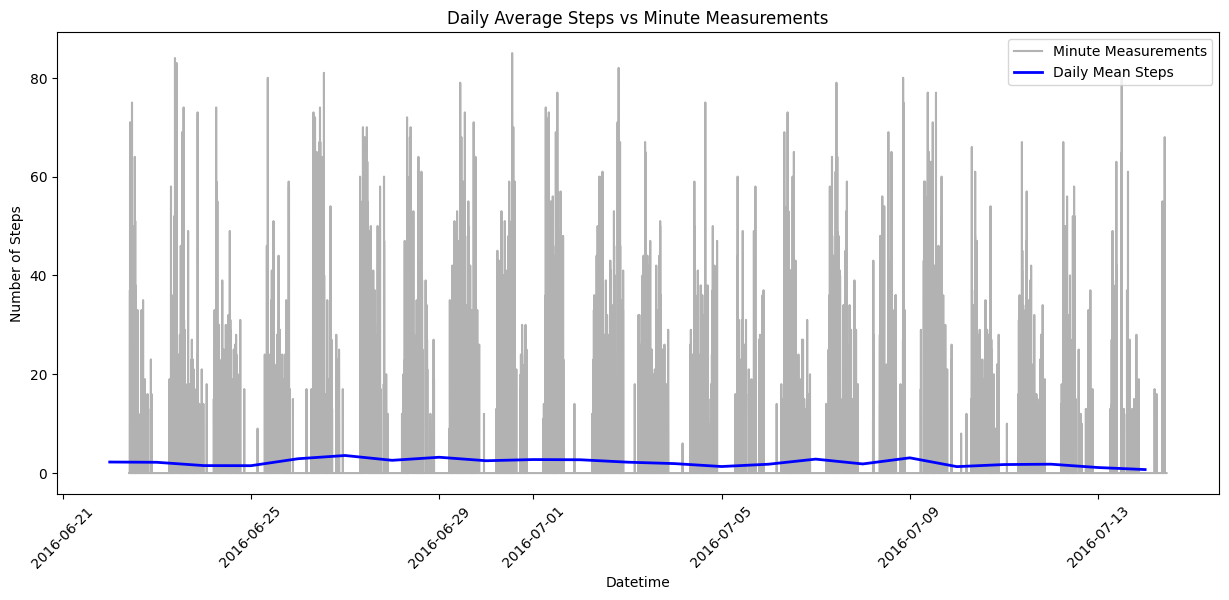

In [75]:
# Extract date and time from Datetime
activity_data['Date'] = activity_data['Datetime'].dt.date
activity_data['Time'] = activity_data['Datetime'].dt.time

# Calculate daily average steps
daily_mean_steps = activity_data.groupby('Date')['Steps'].mean().reset_index()
daily_mean_steps.columns = ['Date', 'Daily Mean Steps']

# Plot daily average steps and individual minute measurements
plt.figure(figsize=(15, 6))

# Plot individual minute measurements
plt.plot(activity_data['Datetime'], activity_data['Steps'], label='Minute Measurements', alpha=0.6, color='gray')

# Plot daily average steps
plt.plot(daily_mean_steps['Date'], daily_mean_steps['Daily Mean Steps'], label='Daily Mean Steps', color='blue', linewidth=2)

# Add labels, title, and legend
plt.xlabel('Datetime')
plt.ylabel('Number of Steps')
plt.title('Daily Average Steps vs Minute Measurements')
plt.xticks(rotation=45)
plt.legend()
plt.show()

4. How does the average step count change during 15-minute intervals throughout the day? Compute and plot these averages across all days in the dataset.

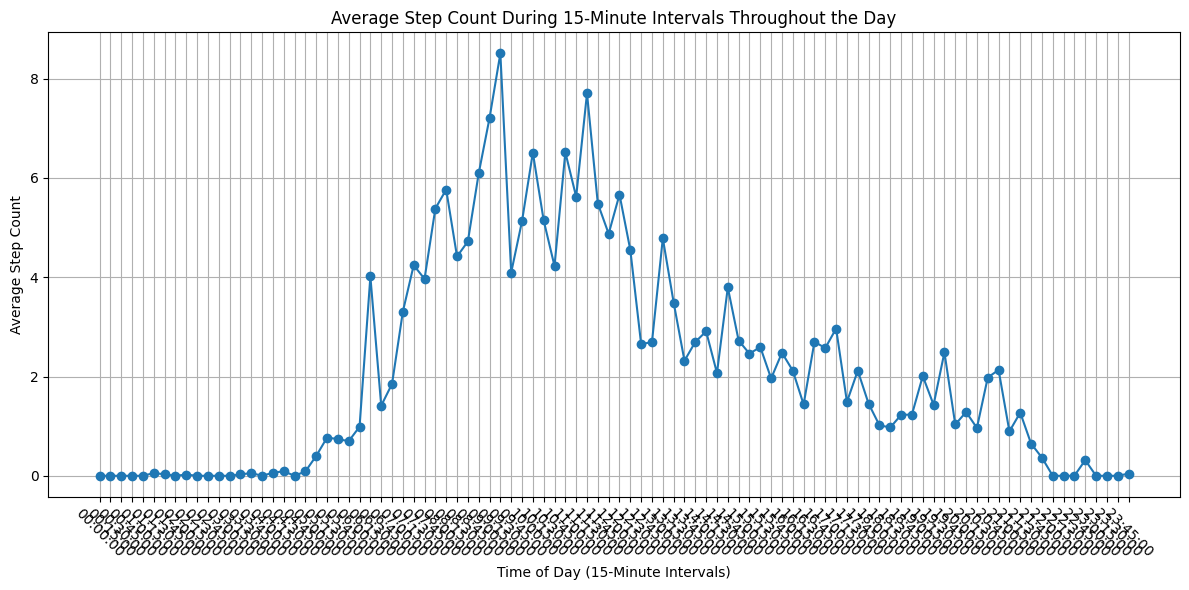

In [83]:

# Extract 15-minute intervals from the 'Datetime' column
activity_data['15_Minute_Interval'] = activity_data['Datetime'].dt.floor('15min').dt.time

# Group by 15-minute intervals and compute the average step count
average_steps_15min = activity_data.groupby('15_Minute_Interval')['Steps'].mean().reset_index()

# Convert the '15_Minute_Interval' to strings for plotting
average_steps_15min['15_Minute_Interval'] = average_steps_15min['15_Minute_Interval'].astype(str)

# Plot the average steps for each 15-minute interval
plt.figure(figsize=(12, 6))
plt.plot(average_steps_15min['15_Minute_Interval'], average_steps_15min['Steps'], marker='o', linestyle='-')
plt.xlabel('Time of Day (15-Minute Intervals)')
plt.ylabel('Average Step Count')
plt.title('Average Step Count During 15-Minute Intervals Throughout the Day')
plt.xticks(rotation=-45)
plt.grid()
plt.tight_layout()
plt.show()

5. For each day represented in the dataset, what is the percentage of minutes without records (missing records)? Please calculate and present this data

In [84]:
# Extract the date from the 'Datetime' column
activity_data['Date'] = activity_data['Datetime'].dt.date

# Total minutes in a day (24 hours * 60 minutes)
total_minutes_per_day = 24 * 60

# Group by 'Date' and count the number of records per day
records_per_day = activity_data.groupby('Date').size().reset_index(name='Recorded Minutes')

# Calculate the percentage of missing records per day
records_per_day['Missing Percentage'] = (
    100 * (total_minutes_per_day - records_per_day['Recorded Minutes']) / total_minutes_per_day
)

# Display the resulting DataFrame
records_per_day


,Date,Recorded Minutes,Missing Percentage
0,2016-06-22,844,41.388889
1,2016-06-23,1440,0.000000
2,2016-06-24,1440,0.000000
3,2016-06-25,1440,0.000000
4,2016-06-26,1440,0.000000
5,2016-06-27,1439,0.069444
6,2016-06-28,1440,0.000000
7,2016-06-29,1440,0.000000
8,2016-06-30,1440,0.000000
9,2016-07-01,1440,0.000000


6. For minutes with missing data, fill in 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories' using the mean values for those minutes across all days where data is available. Save the completed dataset to a DataFrame named `all_activity_df` with columns for 'Datetime', 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'.


In [86]:
# Extract the time portion of the 'Datetime' column for grouping by minute across all days
activity_data['Time'] = activity_data['Datetime'].dt.time

# Identify the columns to fill with mean values
columns_to_fill = ['Steps', 'XCnt', 'YCnt', 'ZCnt', 'Calories']

# Compute the mean for each minute across all days where data is available
minute_means = activity_data.groupby('Time')[columns_to_fill].mean()

# Function to fill missing values using the computed minute means
def fill_missing_values(row):
    if pd.isnull(row[columns_to_fill]).any():
        time = row['Time']
        for col in columns_to_fill:
            if pd.isnull(row[col]):
                row[col] = minute_means.loc[time, col]
    return row

# Apply the function to fill missing values
all_activity_df = activity_data.apply(fill_missing_values, axis=1)

# Keep only the required columns in the final DataFrame
all_activity_df = all_activity_df[['Datetime', 'Steps', 'XCnt', 'YCnt', 'ZCnt', 'Calories']]

# Display the resulting DataFrame
all_activity_df


,Datetime,Steps,XCnt,YCnt,ZCnt,Calories
0,2016-06-22 09:56:00,0,0,0,0,0.000000
1,2016-06-22 09:57:00,0,0,0,0,0.000000
2,2016-06-22 09:58:00,0,0,0,0,0.000000
3,2016-06-22 09:59:00,0,0,0,0,0.000000
4,2016-06-22 10:00:00,0,0,0,0,0.000000
...,...,...,...,...,...,...
31735,2016-07-14 10:52:00,0,0,0,0,0.000000
31736,2016-07-14 10:53:00,0,0,0,0,0.000000
31737,2016-07-14 10:54:00,0,0,0,0,0.000000
31738,2016-07-14 10:55:00,0,0,0,0,0.000000


7. Could you create plots that illustrate the pairwise relationships between 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'? After analyzing these plots, what conclusions can you draw about the relationships and potential correlations between these variables?

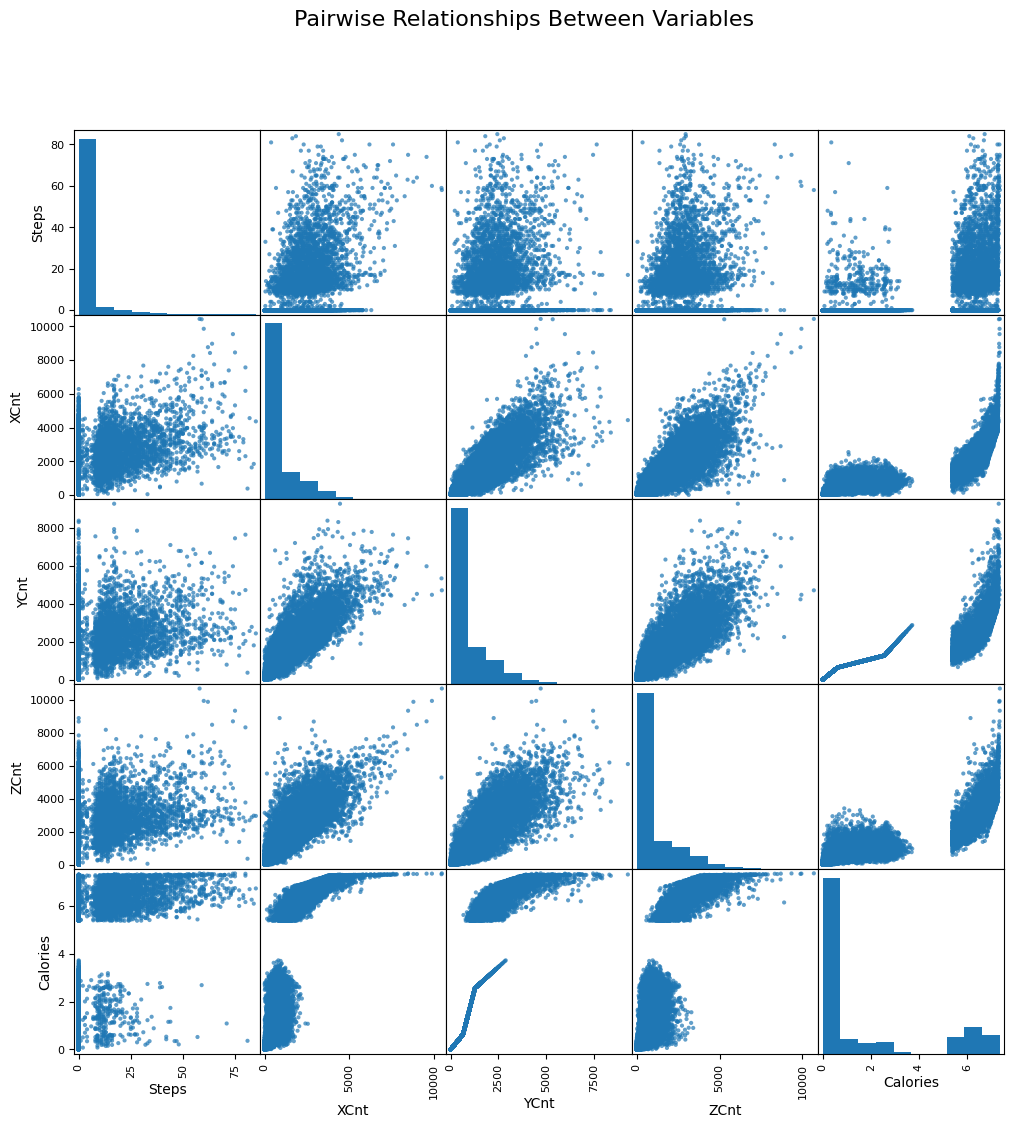

In [87]:
# Select the relevant columns
columns_to_plot = ['Steps', 'XCnt', 'YCnt', 'ZCnt', 'Calories']

# Create pairwise scatter plots
pd.plotting.scatter_matrix(all_activity_df[columns_to_plot], figsize=(12, 12), diagonal='hist', alpha=0.7)

# Add title
plt.suptitle("Pairwise Relationships Between Variables", fontsize=16)
plt.show()

1. Steps vs. Calories: Positive correlation shows more steps lead to higher calorie burn.

2. XCnt, YCnt, ZCnt Relationships: Strong positive correlation among motion counts, reflecting coordinated movements.

3. Steps vs. Motion Counts: Higher steps align with higher motion counts, but not all motion involves stepping.

4. Distributions: Steps and calories are skewed toward lower values, while motion counts show wider variability.

5. Overall Correlation: Steps and calories are linearly correlated; motion counts add complexity to activity patterns.